# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [4]:
df = pd.read_csv("C:/Users/John/Documents/LHL Lecture Material/deployment-project/data/data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Look at some basic statistics for numerical variables.

In [252]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [253]:
df[df['Credit_History'] == 0] 
# 89 people Do not have a credit history
# ApplicantIncome has high outliers and so do CoApplicantIncome
# There is a skew to the Right as the Mean is larger than the median

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
20,LP001043,Male,Yes,0,Not Graduate,No,7660,0.0,104.0,360.0,0.0,Urban,N
22,LP001047,Male,Yes,0,Not Graduate,No,2600,1911.0,116.0,360.0,0.0,Semiurban,N
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,LP002872,NaN,Yes,0,Graduate,No,3087,2210.0,136.0,360.0,0.0,Semiurban,N
584,LP002911,Male,Yes,1,Graduate,No,2787,1917.0,146.0,360.0,0.0,Rural,N
589,LP002926,Male,Yes,2,Graduate,Yes,2726,0.0,106.0,360.0,0.0,Semiurban,N
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [254]:
num_var = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Load_Amount_Term']
cat_var = ['Loan_ID','Gender','Married','Education','Self_Employed','Property_Area']
rank_var = ['Dependents']
target_var = ['Loan_Status']

In [255]:
df['Loan_ID'].nunique() # No duplicate Loan IDs
df['Gender'].nunique() # Male or Female
df['Married'].nunique() # Married or Single
df['Education'].unique() # Graduate vs Not Graduate
df['Self_Employed'].nunique() # Self vs Non-self Employed
df['Property_Area'].unique() # Urban vs Rural vs SemiUrban

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [256]:
df[df['Gender'] == 'Male'].shape[0] / df.shape[0] # ~ 80% Male, 20% Female
df[df['Married'] == 'Yes'].shape[0] / df.shape[0] # ~ 65% Married, 35% Single
df[df['Education'] == 'Graduate'].shape[0] / df.shape[0] # ~ 78% Graduates, 22% Non-Graduates
df[df['Self_Employed'] == 'Yes'].shape[0] / df.shape[0] # ~ 13% Self employed, 87% Employed by others
df[df['Property_Area'] == 'Urban'].shape[0] / df.shape[0] # ~ 33% Urban , 38% Semi-Urban, 29% Rural

0.3289902280130293

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



<AxesSubplot: xlabel='ApplicantIncome', ylabel='Count'>

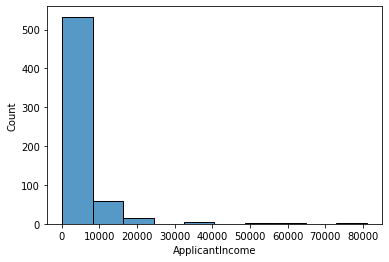

In [257]:
sns.histplot(df['ApplicantIncome'],bins=10)


Look at box plots to understand the distributions. 

<AxesSubplot: >

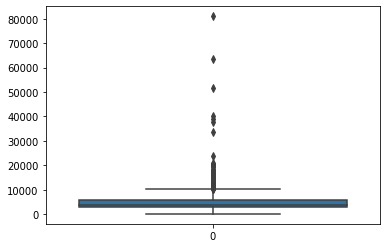

In [258]:
sns.boxplot(df['ApplicantIncome'])

Look at the distribution of income segregated  by `Education`

<AxesSubplot: xlabel='ApplicantIncome', ylabel='Count'>

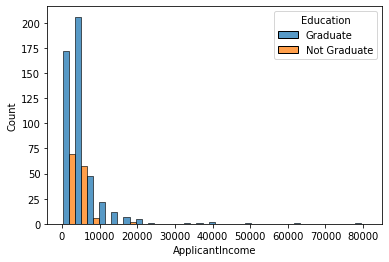

In [259]:
sns.histplot(data=df,x='ApplicantIncome',hue='Education',multiple='dodge',bins = 25)

Look at the histogram and boxplot of LoanAmount

<AxesSubplot: xlabel='LoanAmount', ylabel='Count'>

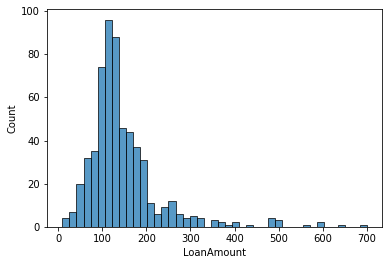

In [260]:
sns.histplot(df['LoanAmount'])

<AxesSubplot: >

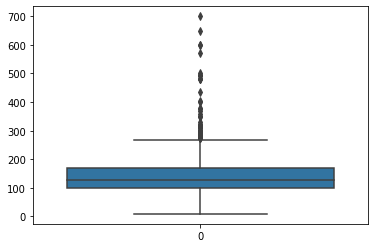

In [261]:
sns.boxplot(df['LoanAmount'])

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [262]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [263]:
pd.DataFrame.pivot_table(df,index='Gender',columns='Credit_History')
# When females are coapplicant, more likely to have no credit history, Female with higher income have a credit history

C:\Users\John\AppData\Local\Temp\ipykernel_31036\2303155252.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pd.DataFrame.pivot_table(df,index='Gender',columns='Credit_History')


ApplicantIncome              CoapplicantIncome               \
Credit_History             0.0          1.0               0.0          1.0   
Gender                                                                       
Female             3804.411765  5013.488095       1136.470588   626.642857   
Male               6253.188406  5323.400524       1622.246377  1739.028586   

                LoanAmount             Loan_Amount_Term              
Credit_History         0.0         1.0              0.0         1.0  
Gender                                                               
Female          124.375000  126.439024         367.5000  350.487805  
Male            153.045455  146.520436         334.6875  340.595745

In [264]:
pd.DataFrame.pivot_table(df,index=['Gender','Credit_History'],columns='Education')
# Males that have graduated have a higher income than their counterparts. Interesting the ones with no credit history has a higher income. 

C:\Users\John\AppData\Local\Temp\ipykernel_31036\1061571161.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pd.DataFrame.pivot_table(df,index=['Gender','Credit_History'],columns='Education')


ApplicantIncome              CoapplicantIncome  \
Education                    Graduate Not Graduate          Graduate   
Gender Credit_History                                                  
Female 0.0                4141.142857  2233.000000       1148.785714   
       1.0                4961.666667  5251.866667        662.492754   
Male   0.0                7530.531915  3524.318182       1521.106383   
       1.0                5778.188742  3606.575000       1863.642119   

                                    LoanAmount              Loan_Amount_Term  \
Education             Not Graduate    Graduate Not Graduate         Graduate   
Gender Credit_History                                                          
Female 0.0             1079.000000  123.714286   129.000000       368.571429   
       1.0              461.733333  130.283582   109.266667       348.529412   
Male   0.0             1838.318182  164.133333   129.285714       338.181818   
       1.0             1268.612500  154.510274   115.413333       344.657718   

                                    
Education             Not Graduate  
Gender Credit_History               
Female 0.0              360.000000  
       1.0              360.000000  
Male   0.0              327.000000  
       1.0              325.076923

In [265]:
pd.DataFrame.pivot_table(df,index=['Gender','Married'],columns=['Dependents'])
# People who have one kid have a higher average income. 

C:\Users\John\AppData\Local\Temp\ipykernel_31036\204466531.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pd.DataFrame.pivot_table(df,index=['Gender','Married'],columns=['Dependents'])


ApplicantIncome                                         \
Dependents                   0            1            2           3+   
Gender Married                                                          
Female No          4514.683333  5206.615385  3588.500000  1776.333333   
       Yes         3568.350000  9264.000000  4553.600000          NaN   
Male   No          5000.669725  7787.100000  4260.166667  8791.333333   
       Yes         5207.033557  5516.361111  5068.151163  7643.238095   

               CoapplicantIncome                                          \
Dependents                     0            1            2            3+   
Gender Married                                                             
Female No             604.850000   120.000000  1041.500000  13889.000000   
       Yes           1496.250000   626.333333  1762.600000           NaN   
Male   No            1652.614679   905.000000   774.666667   1664.333333   
       Yes           2016.054497  1795.486111  1756.730232   1347.142857   

               Credit_History                            LoanAmount  \
Dependents                  0         1         2    3+           0   
Gender Married                                                        
Female No            0.800000  1.000000  1.000000  0.50  111.083333   
       Yes           0.823529  0.833333  1.000000   NaN  120.800000   
Male   No            0.876190  0.714286  0.500000  1.00  135.586538   
       Yes           0.872180  0.828125  0.888889  0.75  148.818182   

                                                   Loan_Amount_Term  \
Dependents               1           2          3+                0   
Gender Married                                                        
Female No       105.833333  129.000000  302.500000       363.157895   
       Yes      293.666667  115.000000         NaN       360.000000   
Male   No       133.700000  126.833333  217.666667       350.803738   
       Yes      159.333333  155.228916  164.243902       337.846154   

                                                    
Dependents               1           2          3+  
Gender Married                                      
Female No       335.076923  360.000000  300.000000  
       Yes      284.000000  384.000000         NaN  
Male   No       312.000000  360.000000  360.000000  
       Yes      336.676056  336.139535  323.414634

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [267]:
# Mode is 0, fill with mode
df['Dependents'] = df['Dependents'].fillna(0)

# Mode is Yes, fill with mode
df['Married'] = df['Married'].fillna('Yes')

# Mode is No, fill with mode
df['Self_Employed'] = df['Self_Employed'].fillna('No')

# Fill with average loan amount by gender
df['LoanAmount'] = np.where((df['LoanAmount'].isna()) & (df['Gender']=='Male'), np.mean(df[df['Gender'] == 'Male']['LoanAmount']),df['LoanAmount'])
df['LoanAmount'] = np.where((df['LoanAmount'].isna()) & (df['Gender']=='Female'), np.mean(df[df['Gender'] == 'Female']['LoanAmount']),df['LoanAmount'])

# Fill with average Loan term
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(np.mean(df['Loan_Amount_Term']))

# Mode is Male, fill with mode
df['Gender'] = df['Gender'].fillna('Male')

# Mode is 1, fill with mode
df['Credit_History'] = df['Credit_History'].fillna('1.0')


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 62.5+ KB


### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

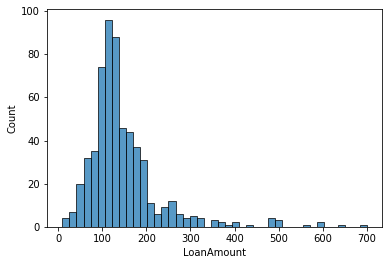

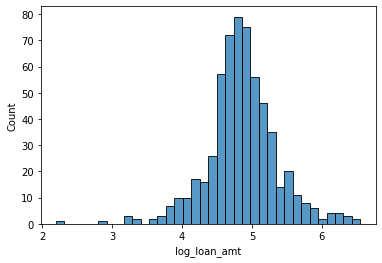

In [11]:
df['log_loan_amt'] = np.log(df['LoanAmount'])
plt.figure(1)
sns.histplot(df['LoanAmount'])

plt.figure(2)
sns.histplot(df['log_loan_amt'])

plt.show()

Combine both incomes as total income and take a log transformation of the same.

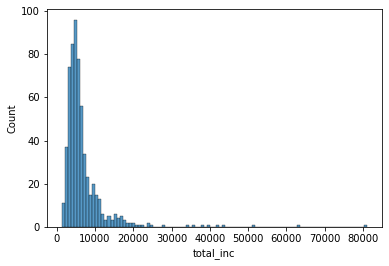

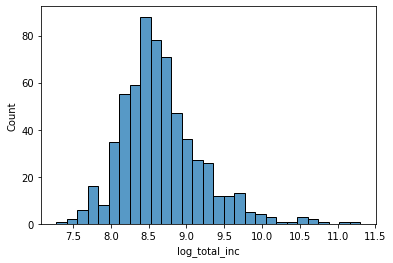

In [12]:
df['total_inc'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['log_total_inc'] = np.log(df['total_inc'])

plt.figure(1)
sns.histplot(df['total_inc'])

plt.figure(2)
sns.histplot(df['log_total_inc'])

plt.show()

## 4. Building a Predictive Model

In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

base_model = LogisticRegression()
scaler = StandardScaler()
onehot = OneHotEncoder(sparse_output=False)

In [8]:
cat_data = ['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']
num_data = ['LoanAmount','Loan_Amount_Term','log_loan_amt','log_total_inc']

In [9]:
for item in cat_data:
    df[item] = df[item].astype('str')
df['Credit_History'][0]

'1.0'

In [13]:
y = df['Loan_Status']
X = df[['Gender','Married','Dependents','Education','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','log_loan_amt','log_total_inc']]

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  log_loan_amt       614 non-null    float64
 14  total_inc          614 non-null    float64
 15  log_total_inc      614 non-null    float64
dtypes: float64(6), int64(1), o

In [276]:
transformed_data = onehot.fit_transform(X[cat_data])
encoded_data = pd.DataFrame(transformed_data, index=df[cat_data].index)
final_df = pd.concat([X, encoded_data],axis=1)
final_df.drop(cat_data,axis=1,inplace=True)
final_df.columns = final_df.columns.astype(str)

In [277]:
x_train,x_test,y_train,y_test = train_test_split(final_df,y, test_size=0.2)

In [278]:
scaled_x_train = scaler.fit_transform(x_train[num_data])
scaled_x_test = scaler.fit_transform(x_test[num_data])
x_train[num_data] = scaled_x_train
x_test[num_data] = scaled_x_test

In [279]:
base_model.fit(x_train,y_train)

LogisticRegression()

In [280]:
y_pred = base_model.predict(x_test)

In [281]:
accuracy_score(y_test,y_pred)

0.8699186991869918

Try paramater grid search to improve the results

In [282]:
param_grid = {'solver': ['liblinear','lbfgs'],
              'C': [0.01,0.1,1,10],
              'penalty': ['l2','l1']}

grid_search = GridSearchCV(estimator=base_model,param_grid=param_grid,cv=5)
grid_search.fit(x_train,y_train)
grid_search.best_params_

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\linear_model\_log

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

In [283]:
new_model = LogisticRegression(C=1,penalty='l1',solver='liblinear')
new_model.fit(x_train,y_train)
y_pred2 = new_model.predict(x_test)
accuracy_score(y_test,y_pred2)

0.8699186991869918

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [30]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2)
print(x_train.dtypes)

Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History       object
Property_Area        object
log_loan_amt        float64
log_total_inc       float64
dtype: object


In [15]:
class RawFeats:
    def __init__(self, feats):
        self.feats = feats
    
    def fit(self,X,y=None):
        pass

    def transform(self,X,y=None):
        return X[self.feats]

    def fit_transform(self,X,y=None):
        self.fit(X)
        return self.transform(X)

cat_data = ['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']
num_data = ['LoanAmount','Loan_Amount_Term','log_loan_amt','log_total_inc']

keep_num = RawFeats(num_data)
keep_cat = RawFeats(cat_data)

In [16]:
# cat_feats = list(X.dtypes[X.dtypes=='object'].index)
# num_feats = list(X.dtypes[X.dtypes!='object'].index)

# def num_feature(data):
#     return data[num_feats]

# def cat_feature(data):
#     return data[cat_feats]

# keep_num = FunctionTransformer(num_feature)
# keep_cat = FunctionTransformer(cat_feature)

num_nulls = SimpleImputer(strategy='mean')
cat_nulls = SimpleImputer(strategy='most_frequent')

In [17]:
numeric_transform = Pipeline([('num_cols',keep_num),
                              ('impute_mean',num_nulls)])

categorical_transform = Pipeline([('cat_cols',keep_cat),
                                  ('impute_mode',cat_nulls),
                                  ('one_hot_encode',onehot)])

preprocessing_tips = FeatureUnion([('num_features',numeric_transform),
                                   ('cat_features',categorical_transform)])

pipeline_tips = Pipeline([('preprocessing',preprocessing_tips),
                          ('model',base_model)])

In [18]:
pipeline_tips.fit(x_train,y_train)

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessing',
                 FeatureUnion(transformer_list=[('num_features',
                                                 Pipeline(steps=[('num_cols',
                                                                  <__main__.RawFeats object at 0x0000020B7A331F70>),
                                                                 ('impute_mean',
                                                                  SimpleImputer())])),
                                                ('cat_features',
                                                 Pipeline(steps=[('cat_cols',
                                                                  <__main__.RawFeats object at 0x0000020B7A331FD0>),
                                                                 ('impute_mode',
                                                                  SimpleImputer(strategy='most_frequent')),
                                                                 ('one_hot_encode',
                                                                  OneHotEncoder(sparse_output=False))]))])),
                ('model', LogisticRegression())])

In [19]:
pipeline_tips.predict(x_test)

array(['N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [ ]:
pipeline_tips.predict_proba(x_test)

In [20]:
model_columns = list(X.columns)
with open('model_columns.pkl','wb') as file:
    pickle.dump(model_columns,file)
    
pickle.dump(pipeline_tips, open('model.pkl','wb'))

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [22]:
import requests

In [43]:
url = 'http://127.0.0.1:5000/predict'

json_data = {'Gender': 'Female',
             'Married': 'No',
             'Dependents': '0',
             'Education': 'Graduate',
             'Self_Employed': 'Yes',
             'LoanAmount': 149.265957,
             'Loan_Amount_Term': 360.0,
             'Credit_History': '1.0',
             'Property_Area': 'Urban',
             'log_loan_amt': 15.00573,
             'log_total_inc': 18.674026}

response = requests.post(url=url, json=json_data)
print(response.json())

{'prediction': ['Y']}
